# STACK OVERFLOW ANALYSIS

In [1]:
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib as plt

In [2]:
query = pd.read_csv("QueryResults.csv", parse_dates = ["CreationDate"])

In [3]:
query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777 entries, 0 to 6776
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             6777 non-null   int64         
 1   PostTypeId     6777 non-null   int64         
 2   CreationDate   6777 non-null   datetime64[ns]
 3   Score          6777 non-null   int64         
 4   ViewCount      6777 non-null   int64         
 5   Tags           6777 non-null   object        
 6   AnswerCount    6777 non-null   int64         
 7   FavoriteCount  1597 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 423.7+ KB


As we can see from the data: 
1. There are alot of missing values in FavoriteCount, this can be fixed by converting the `Null` into 0
2. Tags also need to be edited, as there are alot of tags inside them, things we can do is\
a. Only take 1 of them\
b. count the number of tags and find if tags can increase the popularity\
c. Split the tag\
    and we will split the tag to maintain the data 

### Data Cleaning

In [4]:
#First we will fill the null data in FavouriteCount
query["FavoriteCount"].fillna(0,inplace = True)

In [5]:
#Second we will make the tags into the list
query["Tags"] = query["Tags"].str.replace("><", " ").str.replace("<","").str.replace(">","").str.split(" ").copy()

In [6]:
query.head(5)

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,48242,1,2019-03-30 01:32:37,1,122,[keras],1,0.0
1,48246,1,2019-03-30 06:11:20,4,7233,"[machine-learning, tensorflow, accuracy, metri...",4,1.0
2,48250,1,2019-03-30 08:25:31,0,6836,[pandas],1,0.0
3,48253,1,2019-03-30 09:39:19,0,721,"[keras, tensorflow]",1,0.0
4,48255,1,2019-03-30 10:05:14,1,372,"[machine-learning, optimization, gradient-desc...",1,0.0


### Data Analysis

In [7]:
#Now we are going to find out which tags has the highest time used
most_used = query["Tags"].explode().value_counts().sort_values(ascending = False)
most_used.head(10)

machine-learning    2135
python              1447
deep-learning        890
neural-network       820
keras                706
classification       579
scikit-learn         448
tensorflow           413
nlp                  393
cnn                  379
Name: Tags, dtype: int64

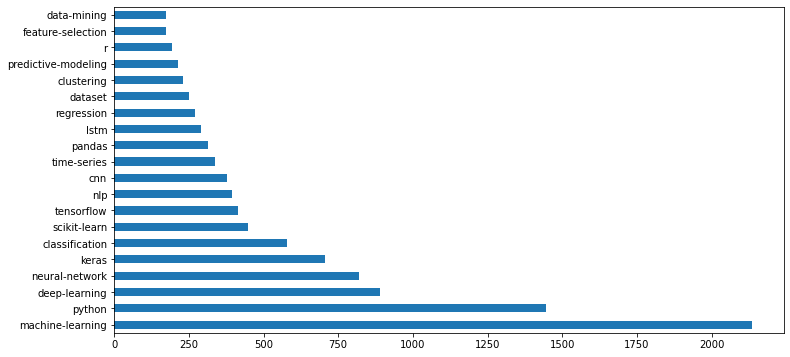

In [8]:
#Top 10 performers
ax = most_used.head(20).plot(kind = "barh", figsize =(12,6))

In [9]:
#Times tag viewed 
view_tags = pd.merge(query["Tags"].explode(),query["ViewCount"],how = "left", left_index= True, right_index = True)

In [10]:
most_viewed = view_tags.groupby(["Tags"])["ViewCount"].sum().sort_values(ascending =False)

In [11]:
most_viewed.head(20)

Tags
python              1945728
machine-learning    1261727
pandas               902218
keras                831846
deep-learning        720269
neural-network       619420
scikit-learn         465518
tensorflow           419774
classification       355663
dataframe            338241
cnn                  270445
nlp                  257931
lstm                 225047
time-series          208555
numpy                189916
regression           152675
pytorch              146022
csv                  141548
dataset              130517
xgboost              124645
Name: ViewCount, dtype: int64

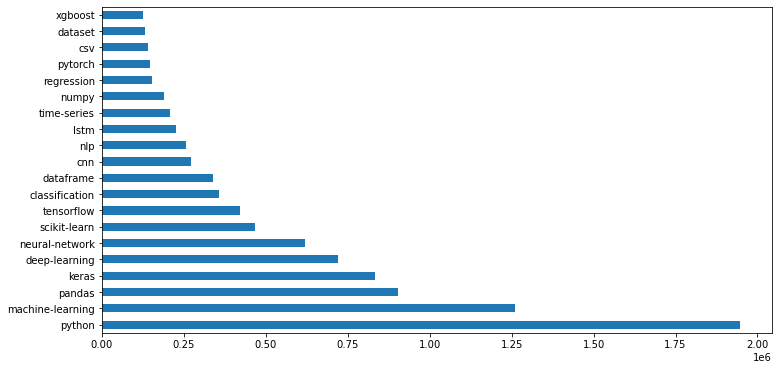

In [12]:
ax = most_viewed.head(20).plot(kind = "barh", xlabel="", figsize = (12,6))

In [25]:
#Deep Learning Auestion analysis
#To Analyze this, we wll focus on the tags, whether the id has deep learning tags on it 
#First question is how many deep learning questions asked per period
allq = pd.read_csv("Allq.csv",parse_dates = ["CreationDate"])
allq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            50000 non-null  int64         
 1   CreationDate  50000 non-null  datetime64[ns]
 2   Tags          50000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ MB


In [26]:
allq["Tags"] = allq["Tags"].str.replace("><"," ").str.replace("<","").str.replace(">","").str.split(" ").copy()

In [38]:
allq["Tags"].explode().value_counts()["deep-learning"]

32

NameError: name 'deep_learning' is not defined

In [ ]:
deep_learning["yearmonth"] = deep_learning["CreationDate"].dt.year *100 + deep_learning["CreationDate"].dt.month